In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Import the dataset using Pandas from above mentioned url.


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv")
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,13/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,14/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,15/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,16/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. High Level Data Understanding:

a. Find no. of rows & columns in the dataset

In [3]:
data.shape

(57394, 49)

 b. Data types of columns.

In [4]:
data.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

 c. Info & describe of data in dataframe.

In [5]:
df=pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


# 3. Low Level Data Understanding :
 a. Find count of unique values in location column.
 b. Find which continent has maximum frequency using values
counts.
 c. Find maximum & mean value in 'total_cases'.
 d. Find 25%,50% & 75% quartile value in 'total_deaths'.
 e. Find which continent has maximum
'human_development_index'.
 f. Find which continent has minimum 'gdp_per_capita'.

In [7]:
##  a. Find count of unique values in location column.

df1=df["location"].nunique()
print(" Count of unique values in location column is",df1)

 Count of unique values in location column is 216


In [8]:
# b.Find which continent has maximum frequency using values counts.

df1=df["continent"].value_counts()
print("The continent with the maximum frequency is:",df1.idxmax())

The continent with the maximum frequency is: Europe


In [9]:
# c. Find maximum & mean value in 'total_cases'.
print("mean value in total cases",df["total_cases"].mean())
print("maximum value in total cases",df["total_cases"].max())

mean value in total cases 167797.3688753302
maximum value in total cases 55154651.0


In [10]:
# d. Find 25%,50% & 75% quartile value in 'total_deaths'.

df1 = df['total_deaths'].quantile(0.25)
df2 = df['total_deaths'].quantile(0.5)
df3 = df['total_deaths'].quantile(0.75)
print("the 25% quartile value in total_deaths :",df1)
print("the 50% quartile value in total_deaths :",df2)
print("the 75% quartile value in total_deaths :",df3)


the 25% quartile value in total_deaths : 13.0
the 50% quartile value in total_deaths : 84.0
the 75% quartile value in total_deaths : 727.0


In [11]:
# e.Find which continent has maximum 'human_development_index'.


df1=df.groupby("continent")["human_development_index"].idxmax()
print("The continent with the maximum frequency is:",df.loc[df1]["continent"].values[0])

The continent with the maximum frequency is: Africa


In [12]:
# f.Find which continent has minimum 'gdp_per_capita

df1=df.groupby("continent")["gdp_per_capita"].idxmin()
print("The continent with the maximum frequency is:",df.loc[df1]["continent"].values[0])

The continent with the maximum frequency is: Africa


In [13]:
# 4. Filter the dataframe with only this columns ['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'] and update the data frame.
specific_columns =['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
df1= df[specific_columns]
df1

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


 # Data Cleaning
 a. Remove all duplicates observations
 b. Find missing values in all columns
 c. Remove all observations where continent column value is
missing
 Tip : using subset parameter in dropna
 d. Fill all missing values with 0


In [14]:
# a.remove all duplicates observations
df.drop_duplicates()
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,13/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,14/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,15/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,16/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# b. Find missing values in all columns
df1= df.isnull().sum()
df1

iso_code                                323
continent                               646
location                                  0
date                                      0
total_cases                            3636
new_cases                               929
new_cases_smoothed                     1742
total_deaths                          13026
new_deaths                              929
new_deaths_smoothed                    1742
total_cases_per_million                3923
new_cases_per_million                   993
new_cases_smoothed_per_million         1807
total_deaths_per_million              13298
new_deaths_per_million                  993
new_deaths_smoothed_per_million        1807
reproduction_rate                     19698
icu_patients                          52904
icu_patients_per_million              52904
hosp_patients                         52389
hosp_patients_per_million             52389
weekly_icu_admissions                 57037
weekly_icu_admissions_per_millio

In [16]:
# Remove all observations where continent column value is missing

df1= df.dropna(subset=['continent'])
df1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56743,ZWE,Africa,Zimbabwe,13/11/20,8696.0,29.0,36.000,255.0,0.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56744,ZWE,Africa,Zimbabwe,14/11/20,8765.0,69.0,42.000,257.0,2.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56745,ZWE,Africa,Zimbabwe,15/11/20,8786.0,21.0,41.143,257.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56746,ZWE,Africa,Zimbabwe,16/11/20,8786.0,0.0,36.429,257.0,0.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [17]:
df_filled = df.fillna(0)
df_filled

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,0,0,International,13/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57390,0,0,International,14/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57391,0,0,International,15/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000
57392,0,0,International,16/11/20,696.0,0.0,0.0,7.0,0.0,0.0,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.00,0.000


# 6. Date time format :
 a.Convert date column in datetime format using
pandas.to_datetime
 b. Create new column month after extracting month data from
date
 column.

In [18]:
# a.Convert date column in datetime format using
df['date'] = pd.to_datetime(df['date'])
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-03-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-04-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,2020-11-13,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,2020-11-14,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,2020-11-15,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,2020-11-16,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# b.Create new column month after extracting month data from date column.

df['month'] = df['date'].dt.month
df


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,12
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,1
2,AFG,Asia,Afghanistan,2020-02-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,2
3,AFG,Asia,Afghanistan,2020-03-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,3
4,AFG,Asia,Afghanistan,2020-04-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,2020-11-13,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
57390,NaN,NaN,International,2020-11-14,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
57391,NaN,NaN,International,2020-11-15,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
57392,NaN,NaN,International,2020-11-16,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


# 7. Data Aggregation:
 a. Find max value in all columns using groupby function on
'continent'
 column
 Tip: use reset_index() after applying groupby
 b. Store the result in a new dataframe named 'df_group

In [20]:
df=df.groupby("continent").max()
df

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month
continent,,,,,,,,,,,,,,,,,,,,,
Africa,ZWE,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,17698.224,...,77.6,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797,12
Asia,YEM,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,49884.137,...,30.3,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933,12
Europe,VAT,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,76541.772,...,5.7,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953,12
North America,VIR,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,43721.784,...,23.5,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926,12
Oceania,WLF,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,41672.600,...,25.1,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939,12
South America,VEN,Venezuela,2020-12-11,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,29170.225,...,7.1,373.159,12.54,34.2,42.9,80.635,5.00,81.44,0.843,12


In [21]:

df1=df.groupby("continent").max().reset_index()
df1

,continent,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month
0,Africa,ZWE,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,...,77.6,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797,12
1,Asia,YEM,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,...,30.3,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933,12
2,Europe,VAT,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,...,5.7,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953,12
3,North America,VIR,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,...,23.5,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926,12
4,Oceania,WLF,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,...,25.1,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939,12
5,South America,VEN,Venezuela,2020-12-11,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,...,7.1,373.159,12.54,34.2,42.9,80.635,5.00,81.44,0.843,12


In [23]:
#   b. Store the result in a new dataframe named 'df_group

df_group=df.groupby("continent").max()
df_group

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month
continent,,,,,,,,,,,,,,,,,,,,,
Africa,ZWE,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,17698.224,...,77.6,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797,12
Asia,YEM,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,49884.137,...,30.3,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933,12
Europe,VAT,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,76541.772,...,5.7,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953,12
North America,VIR,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,43721.784,...,23.5,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926,12
Oceania,WLF,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,41672.600,...,25.1,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939,12
South America,VEN,Venezuela,2020-12-11,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,29170.225,...,7.1,373.159,12.54,34.2,42.9,80.635,5.00,81.44,0.843,12


# 8. Feature Engineering :
 a. Create a new feature 'total_deaths_to_total_cases' by ratio of
 'total_deaths' column to 'total_cases'


In [24]:
#  Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'

df['total_deaths_to_total_cases'] = df['total_deaths'] / df['total_cases']
df

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month,total_deaths_to_total_cases
continent,,,,,,,,,,,,,,,,,,,,,
Africa,ZWE,Zimbabwe,2020-12-11,752269.0,13944.0,12583.714,20314.0,572.0,297.429,17698.224,...,525.432,22.02,9.7,65.8,89.827,6.30,76.88,0.797,12,0.027004
Asia,YEM,Yemen,2020-12-11,8874290.0,97894.0,93198.571,130519.0,2003.0,1168.000,49884.137,...,724.417,17.72,26.9,78.1,98.999,13.05,84.86,0.933,12,0.014708
Europe,VAT,Vatican,2020-12-11,1991233.0,86852.0,54868.571,52147.0,2004.0,1101.000,76541.772,...,539.849,10.08,44.0,58.3,97.719,13.80,86.75,0.953,12,0.026188
North America,VIR,United States Virgin Islands,2020-12-11,11205486.0,184813.0,156419.143,247220.0,4928.0,2715.143,43721.784,...,430.548,17.11,19.1,53.3,90.650,5.80,83.92,0.926,12,0.022062
Oceania,WLF,Wallis and Futuna,2020-12-11,27750.0,1384.0,551.714,907.0,59.0,22.000,41672.600,...,561.494,30.53,23.5,48.8,82.502,3.84,83.44,0.939,12,0.032685
South America,VEN,Venezuela,2020-12-11,5876464.0,69074.0,46393.000,166014.0,3935.0,1096.714,29170.225,...,373.159,12.54,34.2,42.9,80.635,5.00,81.44,0.843,12,0.028251


# 9. Data Visualization :
 a. Perform Univariate analysis on 'gdp_per_capita' column by
plotting
 histogram using seaborn dist plot.
 b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
 c. Plot Pairplot on df_groupby dataset.
 d. Plot a bar plot of 'continent' column with 'total_cases' .

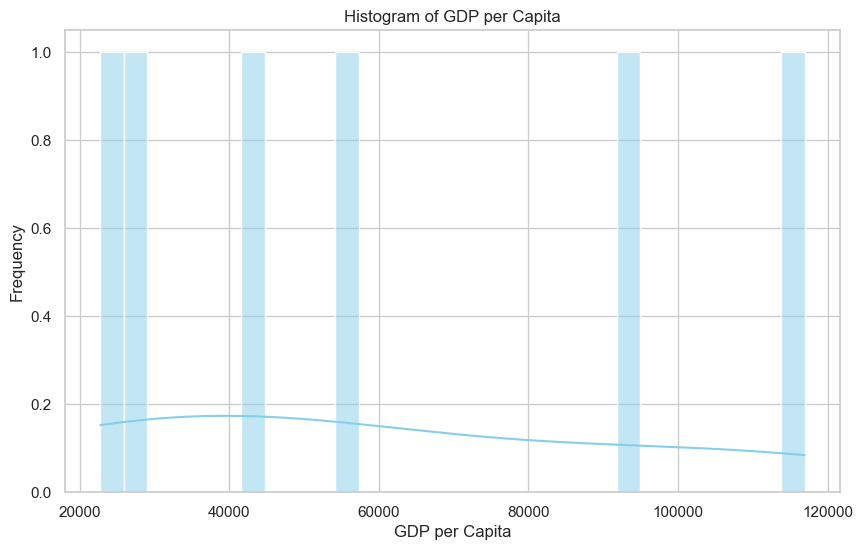

In [25]:
# a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


gdp_per_capita_column = df['gdp_per_capita']


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(gdp_per_capita_column, kde=True, bins=30, color='skyblue')
plt.title('Histogram of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()


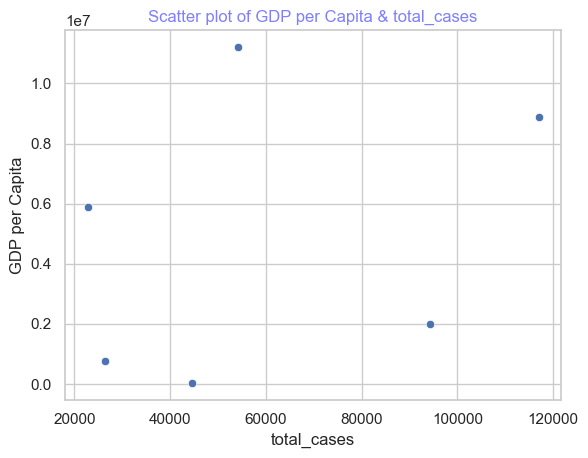

In [26]:
#  b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


gdp_per_capita = df['gdp_per_capita']
total_cases = df['total_cases']

sns.scatterplot(x = gdp_per_capita, y = total_cases)
plt.title('Scatter plot of GDP per Capita & total_cases',color="blue",alpha=0.5)
plt.ylabel('GDP per Capita')
plt.xlabel('total_cases')
plt.show()


In [ ]:
#  c. Plot Pairplot on df_groupby dataset.
sns.pairplot(df_group)
plt.suptitle("Pairplot of df_groupby Dataset", y=1.02)
plt.show()

In [ ]:
# d. Plot a bar plot of 'continent' column with 'total_cases' .
plt.bar(continent, total_cases)
plt.title("continent vs total_cases")
plt.ylabel("no of cases in world")

# 10.Save the df_groupby dataframe in your local drive using pandas.to_csv function .

In [ ]:
df_group.to_csv("Assign.csv")